<a href="https://colab.research.google.com/github/MohneetKaur/Amazon_Laptop_Pricing_Web_App/blob/main/ANN%20using%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q keras

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                120       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 20)                220       
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_14 (Dense)            (None, 15)                315       
                                                                 
 dropout_11 (Dropout)        (None, 15)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

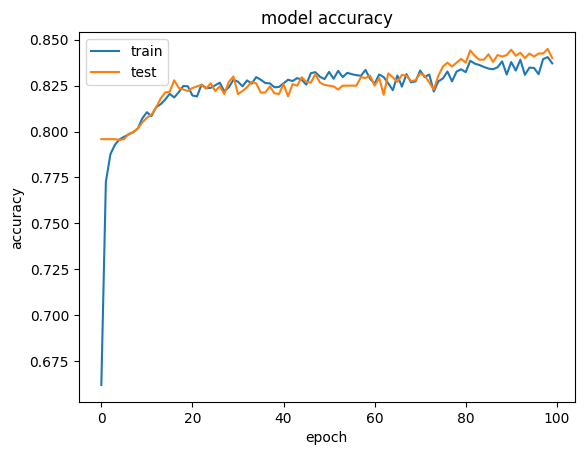

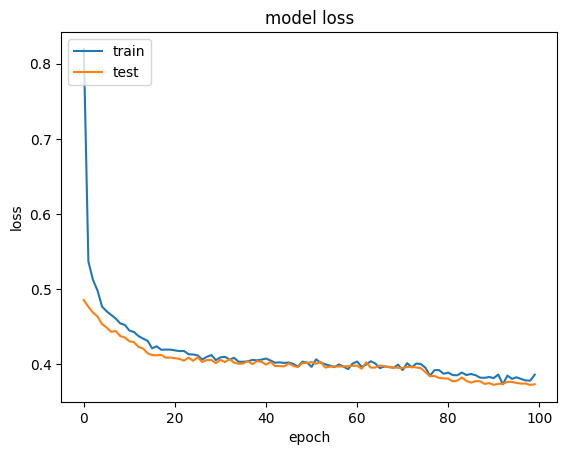

63/63 [==============================] - 0s 1ms/step
0.858


In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dropout(0.3))

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=20,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.4))

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

classifier.summary()

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

# to add early stopping: callbacks=early_stopping
model_history=classifier.fit(X_train,y_train,validation_split=0.30,batch_size=10,epochs=100)

# list all data in history

print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

print(score)


